# Lab Customer Analysis - Part 2

In [87]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import math


In [88]:
#Reading data
data= pd.read_csv('marketing_customer_analysis.csv')

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [89]:
#Retrieving numerical data and store in a variable
numericals = data.select_dtypes(include = np.number)
pd.DataFrame(numericals.dtypes)

,0
Customer Lifetime Value,float64
Income,int64
Monthly Premium Auto,int64
Months Since Last Claim,int64
Months Since Policy Inception,int64
Number of Open Complaints,int64
Number of Policies,int64
Total Claim Amount,float64


In [90]:
# Retrieving categorical data and store in a varable
categoricals = data.select_dtypes(include = np.object)
pd.DataFrame(categoricals.dtypes)

,0
Customer,object
State,object
Response,object
Coverage,object
Education,object
Effective To Date,object
EmploymentStatus,object
Gender,object
Location Code,object
Marital Status,object


## Now we will try to check the normality of the numerical variables visually.

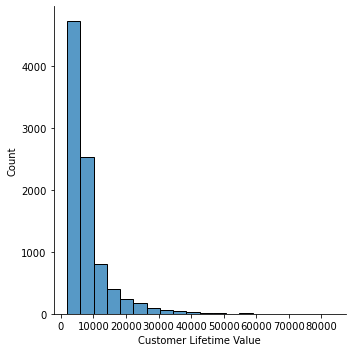

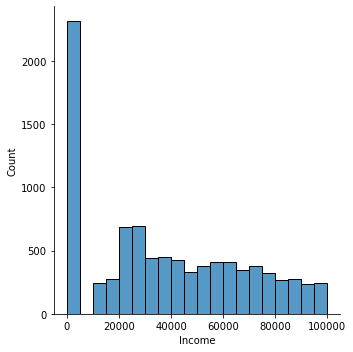

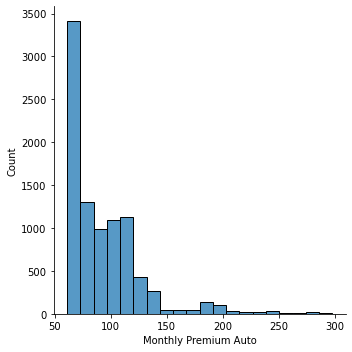

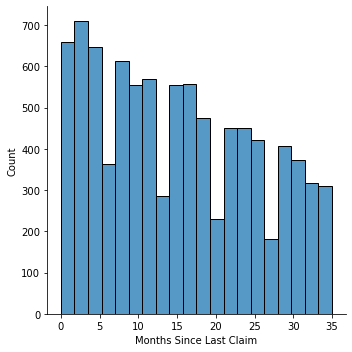

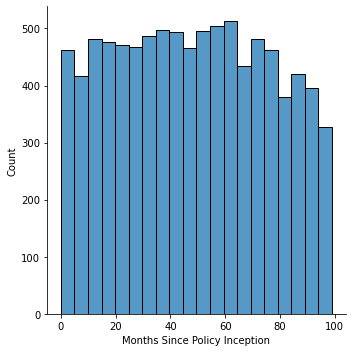

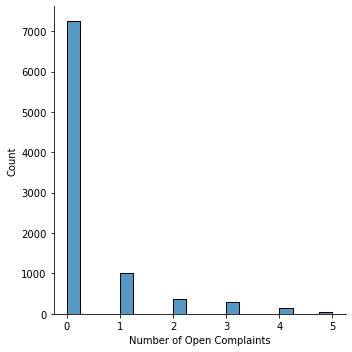

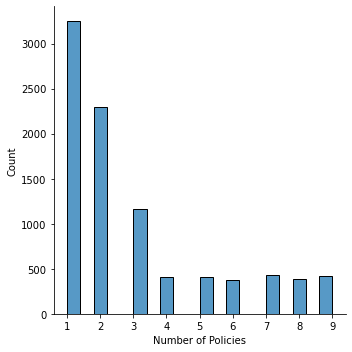

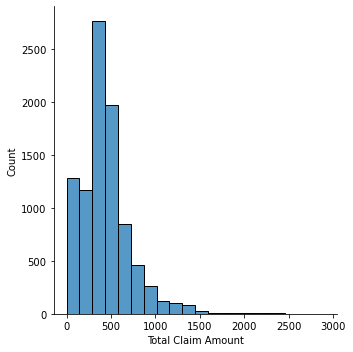

In [91]:
# Use Seaborn library to construct distribution plots for the numerical variables
for i in range(8):
    sns.displot(numericals.iloc[:,i],bins=20)
    plt.show()

<AxesSubplot:>

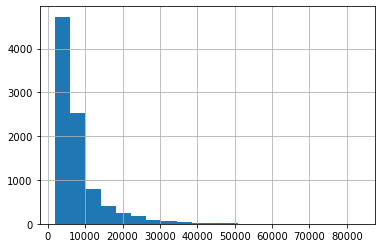

<AxesSubplot:>

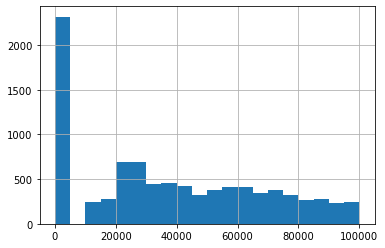

<AxesSubplot:>

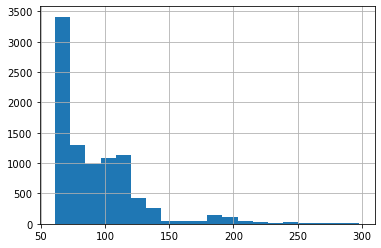

<AxesSubplot:>

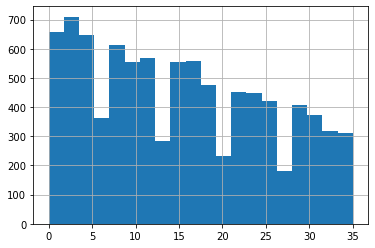

<AxesSubplot:>

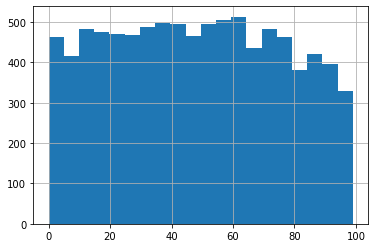

<AxesSubplot:>

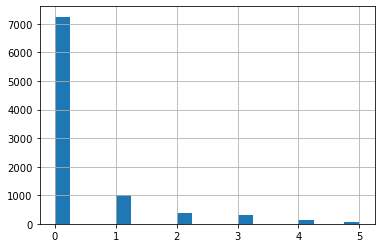

<AxesSubplot:>

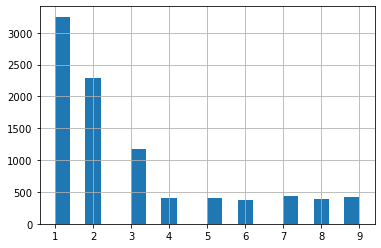

<AxesSubplot:>

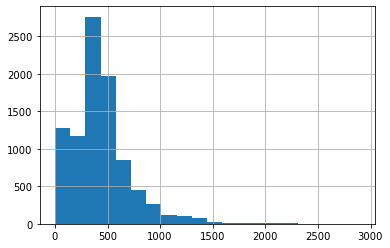

In [92]:
# Use Matplotlib to construct histograms
for i in range(8):
    numericals.iloc[:,i].hist(bins=20) 
    plt.show()

In [93]:
# Do the distributions for different numerical variables look like a normal distribution

<AxesSubplot:xlabel='Customer Lifetime Value'>

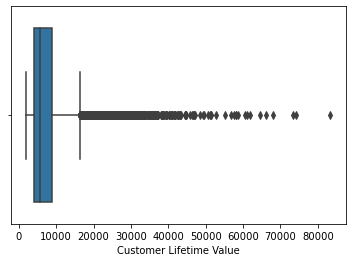

<AxesSubplot:xlabel='Income'>

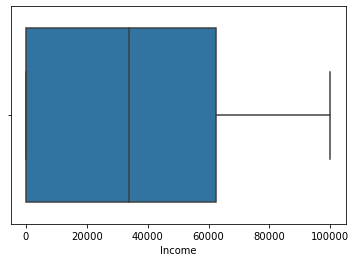

<AxesSubplot:xlabel='Monthly Premium Auto'>

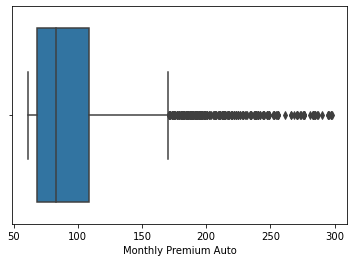

<AxesSubplot:xlabel='Months Since Last Claim'>

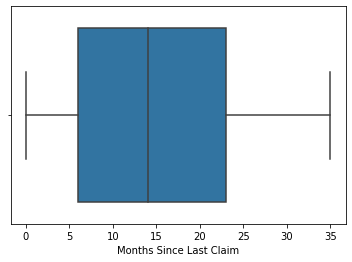

<AxesSubplot:xlabel='Months Since Policy Inception'>

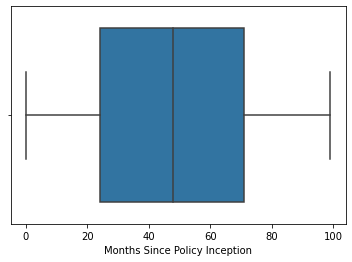

<AxesSubplot:xlabel='Number of Open Complaints'>

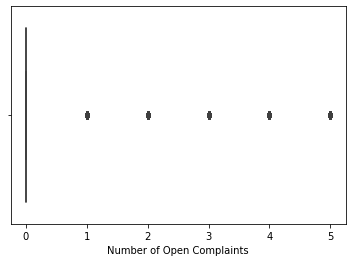

<AxesSubplot:xlabel='Number of Policies'>

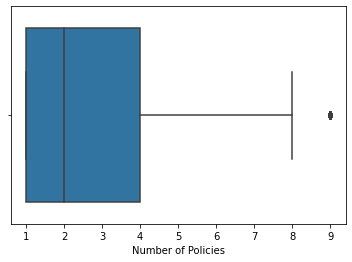

<AxesSubplot:xlabel='Total Claim Amount'>

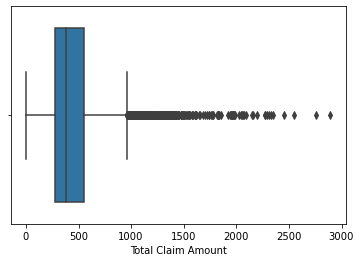

In [94]:
# Checking visually for potential disturbing outliers with Box Plot.

import warnings
warnings.filterwarnings('ignore')

for i in range(8):
    sns.boxplot(numerical.iloc[:,i])
    plt.show()

In [95]:
# Removing extreme or entry error outliers

In [96]:
#### Dropping Number of Open Complaints:
numericals = numericals.drop(['Number of Open Complaints'],axis=1)

#### Cleaning the outliers of Income
len(numericals[numericals['Income']<=0]) 
numericals['Income'] =np.where(numericals['Income']<0,0,numericals['Income'])
mean= np.sum(numericals['Income'])/len(data[numericals['Income']>0])
numericals['Income']=numericals['Income'].replace(0,mean)

#### Cleaning the outliers of Months Since Last Claim
len(numericals[numericals['Months Since Last Claim']<=0]) 
numericals['Months Since Last Claim'] =np.where(numericals['Months Since Last Claim']<0,0,numericals['Months Since Last Claim'])
mean= np.sum(numericals['Months Since Last Claim'])/len(data[numericals['Months Since Last Claim']>0])
numericals['Months Since Last Claim']=numericals['Months Since Last Claim'].replace(0,mean)

#### Cleaning the outliers of Months Since Policy Inception
len(numericals[numericals['Months Since Policy Inception']<=0]) 
numericals['Months Since Policy Inception'] =np.where(numericals['Months Since Policy Inception']<0,0,numericals['Months Since Last Claim'])
mean= np.sum(numericals['Months Since Policy Inception'])/len(data[numericals['Months Since Policy Inception']>0])
numericals['Months Since Policy Inception']=numericals['Months Since Last Claim'].replace(0,mean)

#### Cleaning the outliers of Total Claim Amount
len(numericals[numericals['Total Claim Amount']<=0]) 
numericals['Total Claim Amount'] =np.where(numericals['Total Claim Amount']<0,0,numericals['Total Claim Amount'])
mean= np.sum(numericals['Total Claim Amount'])/len(data[numericals['Total Claim Amount']>0])
numericals['Total Claim Amount']=numericals['Total Claim Amount'].replace(0,mean)

2317

314

83

0

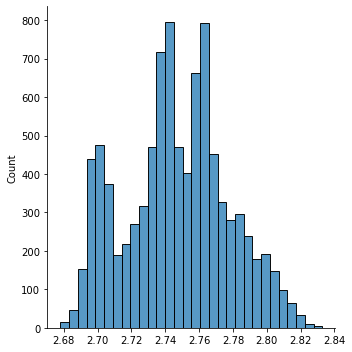

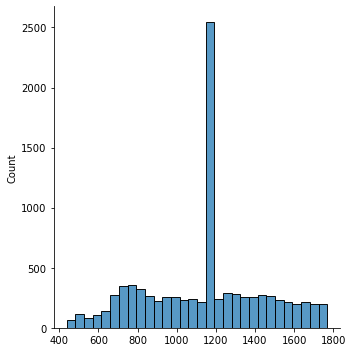

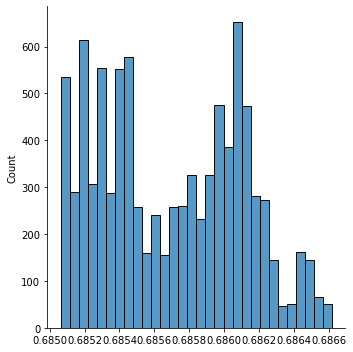

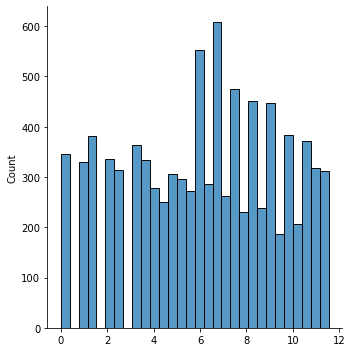

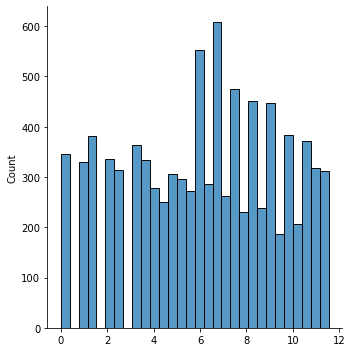

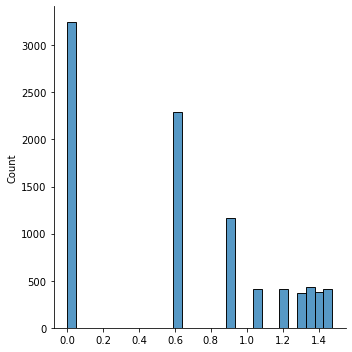

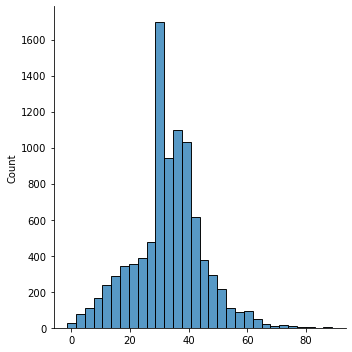

In [97]:
# Iterate to apply BoxCox and check for normal distribution
from scipy import stats
for i in numericals.columns:
        xt, lmbda = stats.boxcox(numericals[i])
        sns.displot(xt, bins=30)
        plt.show()

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount_ as the target variable.

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.002547,0.396262,0.018143,0.018143,0.021955,0.226451
Income,0.002547,1.000000,-0.010753,-0.029195,-0.029195,-0.001144,-0.166704
Monthly Premium Auto,0.396262,-0.010753,1.000000,0.007548,0.007548,-0.011233,0.632017
Months Since Last Claim,0.018143,-0.029195,0.007548,1.000000,1.000000,0.009571,0.005995
Months Since Policy Inception,0.018143,-0.029195,0.007548,1.000000,1.000000,0.009571,0.005995
Number of Policies,0.021955,-0.001144,-0.011233,0.009571,0.009571,1.000000,-0.002354
Total Claim Amount,0.226451,-0.166704,0.632017,0.005995,0.005995,-0.002354,1.000000


<AxesSubplot:>

Text(0.5, 1.0, 'Numerical data correlation matrix:\n(Seaborn Heatmap)\n\n')

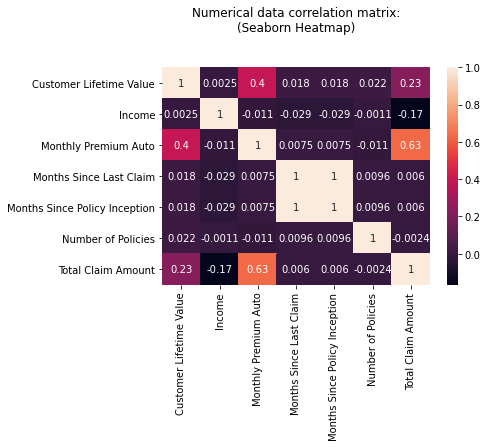

In [99]:
# Run the correlation matrix
correlation_matrix= numericals.corr()
correlation_matrix
# Visualize with Seaborn Heatmap
sns.heatmap(correlation_matrix,annot=True)
plt.title('Numerical data correlation matrix:\n(Seaborn Heatmap)\n\n')
plt.show()

In [101]:
#separate the features(we are trying to predict the Traget so this one will be the feature) from the labels
y= data['Total Claim Amount'] # this one is the feature we are trying to predict
X= data.drop(['Total Claim Amount'],axis=1) # this are the rest of labelss

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount
0,0.010629,0.514064,0.033755,0.911765,0.000,0.132974
1,0.062406,0.449386,0.139241,0.352941,0.875,0.391051
2,0.134960,0.430601,0.198312,0.500000,0.125,0.195764
3,0.070589,0.449386,0.189873,0.500000,0.750,0.183117
4,0.011245,0.375778,0.050633,0.323529,0.000,0.047710


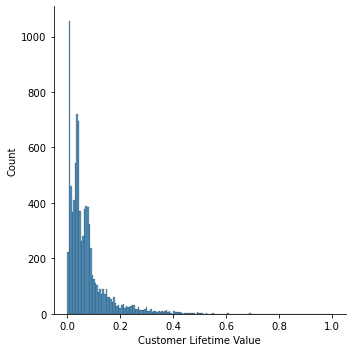

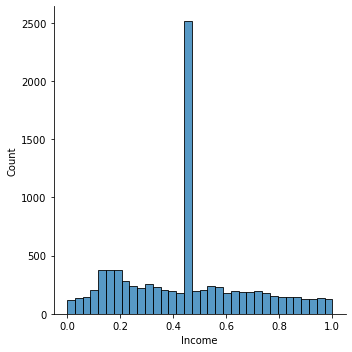

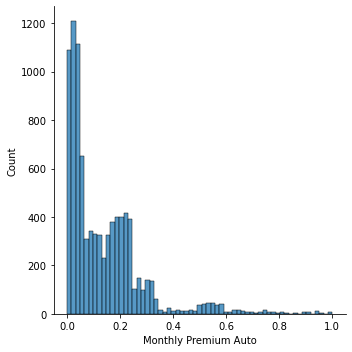

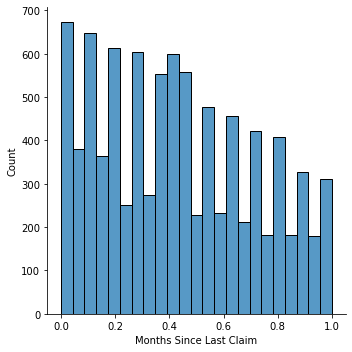

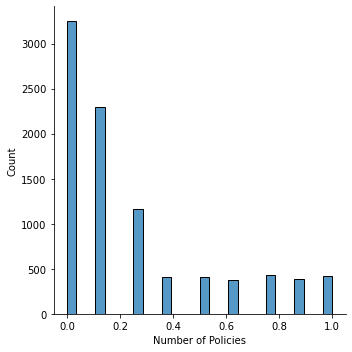

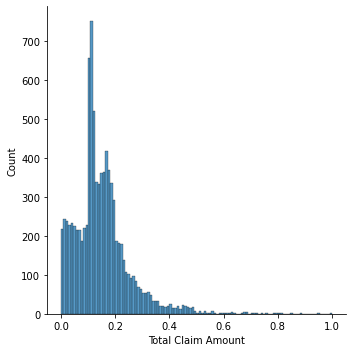

IndexError: single positional indexer is out-of-bounds

In [123]:
#in this ocassion, we have decided to standardize the data with the MinMaxScaler in order to make numbers to be between -1 and 1  
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(numericals)
x_standardized = transformer.transform(numericals)
numerical2=pd.DataFrame(x_standardized, columns=numericals.columns)
numerical2.head()



for i in range(8):
    sns.displot(numerical2.iloc[:,i])
    plt.show()

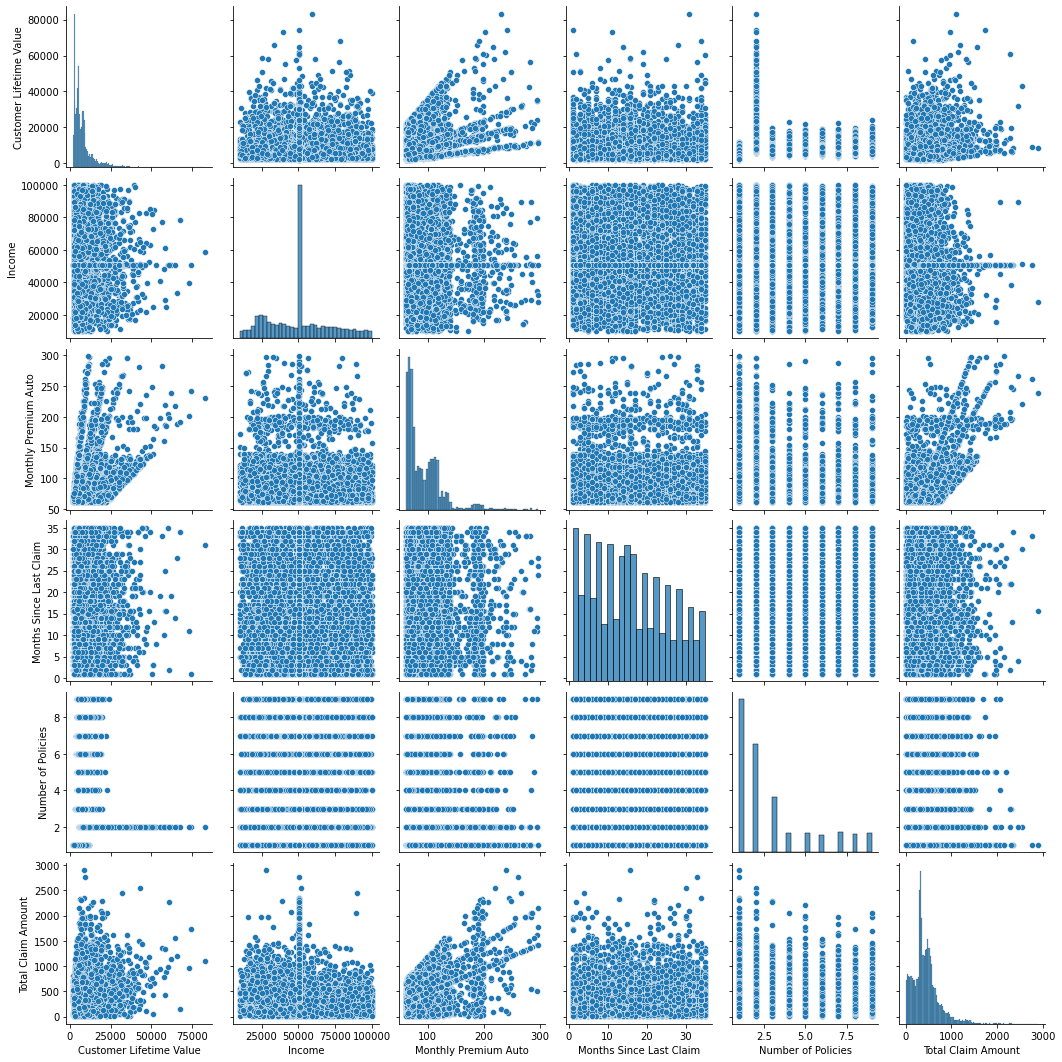

In [125]:
sns.pairplot(numericals)
plt.show()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.002547,0.396262,0.018143,0.021955,0.226451
Income,0.002547,1.000000,-0.010753,-0.029195,-0.001144,-0.166704
Monthly Premium Auto,0.396262,-0.010753,1.000000,0.007548,-0.011233,0.632017
Months Since Last Claim,0.018143,-0.029195,0.007548,1.000000,0.009571,0.005995
Number of Policies,0.021955,-0.001144,-0.011233,0.009571,1.000000,-0.002354
Total Claim Amount,0.226451,-0.166704,0.632017,0.005995,-0.002354,1.000000


<AxesSubplot:>

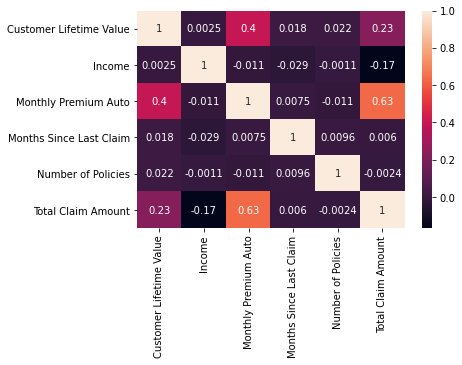

In [126]:
correlation_matrix= numericals.corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [127]:
X_num= X.select_dtypes(include=np.number)
X_cat= X.select_dtypes(include=np.object)

In [128]:
X_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [129]:
X_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [130]:
from sklearn.preprocessing import OneHotEncoder
#we hae ve chosen 3 categorical columns and used oneehotencoder in order to code them with 0 and 1

In [131]:
X_cat['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [132]:
encoder2 = OneHotEncoder().fit(X_cat[['Vehicle Size']])
print(encoder2.categories_)
encoded2 = encoder2.transform(X_cat[['Vehicle Size']]).toarray()
print(encoded2)
onehot_encoded2 = pd.DataFrame(encoded2,columns=encoder2.categories_)
onehot_encoded2.head()

[array(['Large', 'Medsize', 'Small'], dtype=object)]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


,Large,Medsize,Small
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [133]:
onehot_encoded2 = onehot_encoded2.drop(['Small'],axis=1)
onehot_encoded2.head()

,Large,Medsize
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [134]:
X_cat['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [135]:
encoder3 = OneHotEncoder().fit(X_cat[['Marital Status']])
print(encoder3.categories_)
encoded3 = encoder3.transform(X_cat[['Marital Status']]).toarray()
print(encoded3)
onehot_encoded3 = pd.DataFrame(encoded3,columns=encoder3.categories_)
onehot_encoded3.head()

[array(['Divorced', 'Married', 'Single'], dtype=object)]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


,Divorced,Married,Single
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [136]:
onehot_encoded3 = onehot_encoded3.drop(['Divorced'],axis=1)
onehot_encoded3.head()

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [137]:
encoder4 = OneHotEncoder().fit(X_cat[['EmploymentStatus']])
print(encoder4.categories_)
encoded4 = encoder4.transform(X_cat[['EmploymentStatus']]).toarray()
print(encoded4)
onehot_encoded4 = pd.DataFrame(encoded4,columns=encoder4.categories_)
onehot_encoded4.head()

[array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object)]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [138]:
onehot_encoded4 = onehot_encoded4.drop(['Unemployed'],axis=1)
onehot_encoded4.head()

,Disabled,Employed,Medical Leave,Retired
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [140]:
X = pd.concat([numerical2, onehot_encoded2, onehot_encoded3, onehot_encoded4], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount,"(Large,)","(Medsize,)","(Married,)","(Single,)","(Disabled,)","(Employed,)","(Medical Leave,)","(Retired,)"
0,0.010629,0.514064,0.033755,0.911765,0.000,0.132974,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.062406,0.449386,0.139241,0.352941,0.875,0.391051,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.134960,0.430601,0.198312,0.500000,0.125,0.195764,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.070589,0.449386,0.189873,0.500000,0.750,0.183117,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.011245,0.375778,0.050633,0.323529,0.000,0.047710,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [142]:
y = data['Total Claim Amount']
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=1000)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6667, 14)
(2467, 14)
(6667,)
(2467,)


In [145]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount,"(Large,)","(Medsize,)","(Married,)","(Single,)","(Disabled,)","(Employed,)","(Medical Leave,)","(Retired,)"
8827,0.030300,0.150416,0.215190,0.058824,0.000,0.185785,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7559,0.036609,0.370464,0.000000,0.029412,0.625,0.138326,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
916,0.040290,0.632683,0.016878,0.941176,0.750,0.018314,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9011,0.037370,0.449386,0.042194,0.617647,1.000,0.176850,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7817,0.038738,0.273592,0.033755,0.000000,0.500,0.076162,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [146]:
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount,"(Large,)","(Medsize,)","(Married,)","(Single,)","(Disabled,)","(Employed,)","(Medical Leave,)","(Retired,)"
768,0.006673,0.449386,0.016878,0.176471,0.000,0.107807,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1477,0.032330,0.273537,0.236287,0.647059,0.000,0.161146,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3902,0.081089,0.768434,0.189873,0.323529,0.750,0.175830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2713,0.208231,0.449386,0.472574,0.676471,0.125,0.430501,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
165,0.072127,0.131626,0.029536,0.323529,0.125,0.160834,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [147]:
model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)

In [148]:
model.predict(X_test)

array([312.      , 466.318191, 508.8     , ...,  79.934072, 497.392925,
       571.2     ])

In [150]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

1.0

In [151]:
predicted= model.predict(X_test)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
from sklearn.metrics import r2_score

predictions= model.predict(X_test)
r2_score(y_test, predictions)

1.0

In [154]:

mse = mean_squared_error(y_test, predictions)
print(mse)

1.2103723749568761e-25


In [245]:
from scipy.stats import shapiro

In [246]:
shapiro(data_num)

/Users/nataliajanssen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4013866186141968, pvalue=0.0)